In [1]:
%matplotlib inline

# APOE Gene Surface (Want Voxelwise Next)

In [41]:
from netneurotools import datasets as nntdata
from neuromaps import images
from brainstat.datasets import fetch_template_surface

schaefer200 = nntdata.fetch_schaefer2018('fsaverage')['200Parcels7Networks']# Grab schaefer 200 ROI map 
schaefer200_gii = neuromaps.images.annot_to_gifti(schaefer200)# Convert schaefer annot file to gifti
schaefer200_data = images.load_data(schaefer200_gii)# Load data from schaefergii
surfaces = fetch_template_surface("fsaverage", join=False) 

In [42]:
from brainstat.context.genetics import surface_genetic_expression

# Grab expression data
exp_fs = surface_genetic_expression(schaefer200_gii, 
                                        surfaces, 
                                        space="fsaverage", 
                                        lr_mirror='bidirectional') # mirror data to account for missing values

2022-11-15 14:55:53,926 - brainstat - INFO - If you use BrainStat's genetics functionality, please cite abagen (https://abagen.readthedocs.io/en/stable/citing.html).


/opt/anaconda3/lib/python3.8/site-packages/abagen/surfaces.py:133: RuntimeWarning: invalid value encountered in true_divide
  w = (np.sum((A - B) * (V - B), axis=0, keepdims=True)


In [43]:
# Define genetic data 
APOE = exp_fs["APOE"].to_numpy()

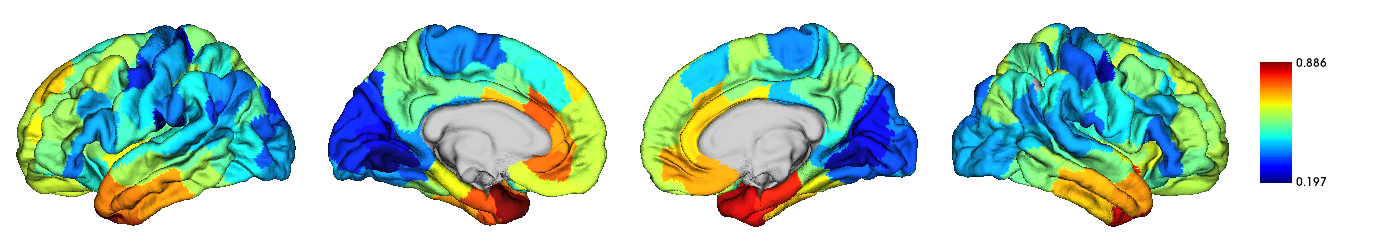

In [52]:
# Visualize in brainstat
# Plot APOE data onto schaefer parcellation 
vertexwise_APOE = map_to_labels(
    APOE,
    schaefer200_data,
    mask=schaefer200_data != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise_APOE,
    cmap='jet',
    color_bar=True,
    embed_nb=True,
    size=(1400, 250),
    zoom=1.45,
    nan_color=(0.7, 0.7, 0.7, 1),
    cb__labelTextProperty={"fontSize": 12},
)

# Tau Surface (Want Voxelwise Next)

In [38]:
import pandas as pd
tau_data = pd.read_csv('/Users/hobbsd/Documents/GitHub/Neuromaps_Toolbox/regional_tau_data_schaefer7_,200_220822.csv', sep=",")
tau_summary = tau_data[['ROI.Label','region','hemi','baseline_taudif_symptomatic_control']]
tau_diff = tau_summary['baseline_taudif_symptomatic_control'].to_numpy()

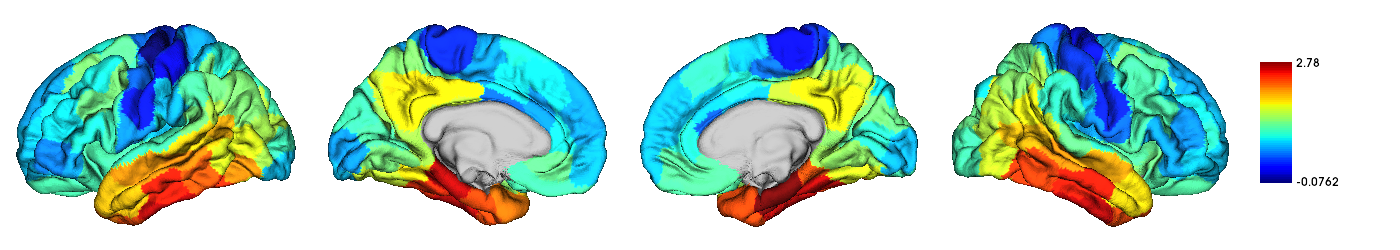

In [46]:
# Visualize in brainstat
# Plot tau_diff data onto schaefer parcellation 
vertexwise_tau_diff = map_to_labels(
    tau_diff,
    schaefer200_data,
    mask=schaefer200_data != 0,
    fill=np.nan,
)
plot_hemispheres(
    surfaces[0],
    surfaces[1],
    vertexwise_tau_diff,
    cmap='jet',
    color_bar=True,
    embed_nb=True,
    size=(1400, 250),
    zoom=1.45,
    nan_color=(0.7, 0.7, 0.7, 1),
    cb__labelTextProperty={"fontSize": 12},
)